In [3]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import seaborn as sns
import time


# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

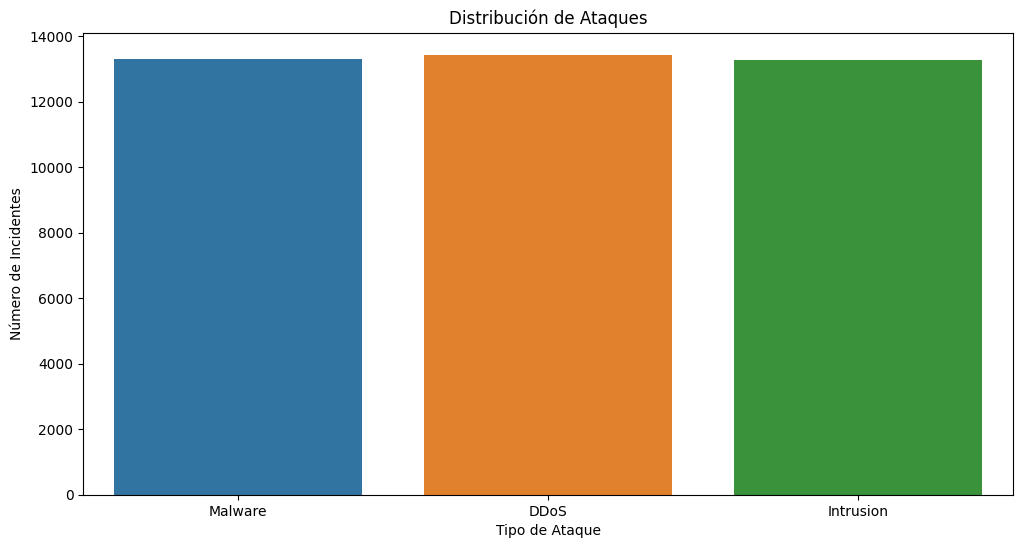

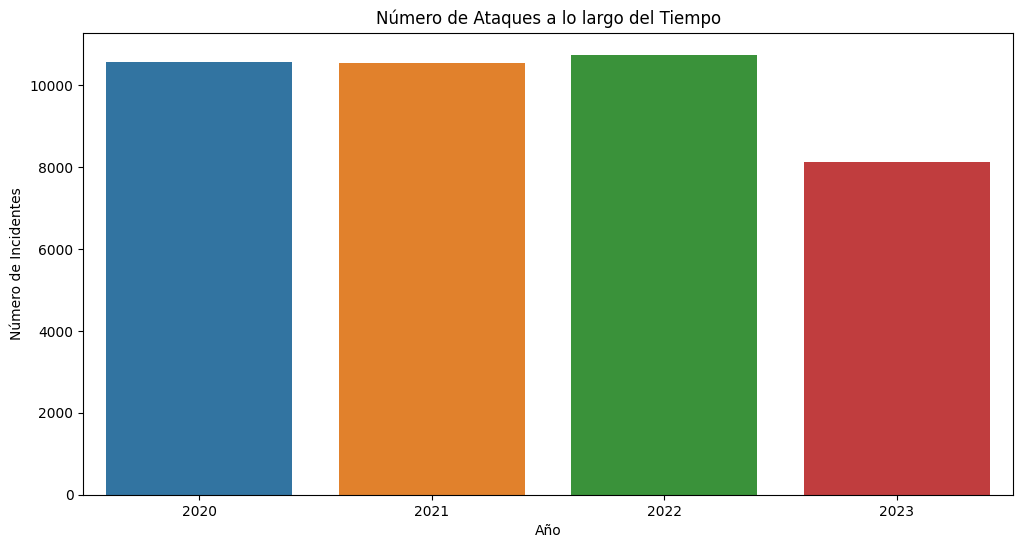

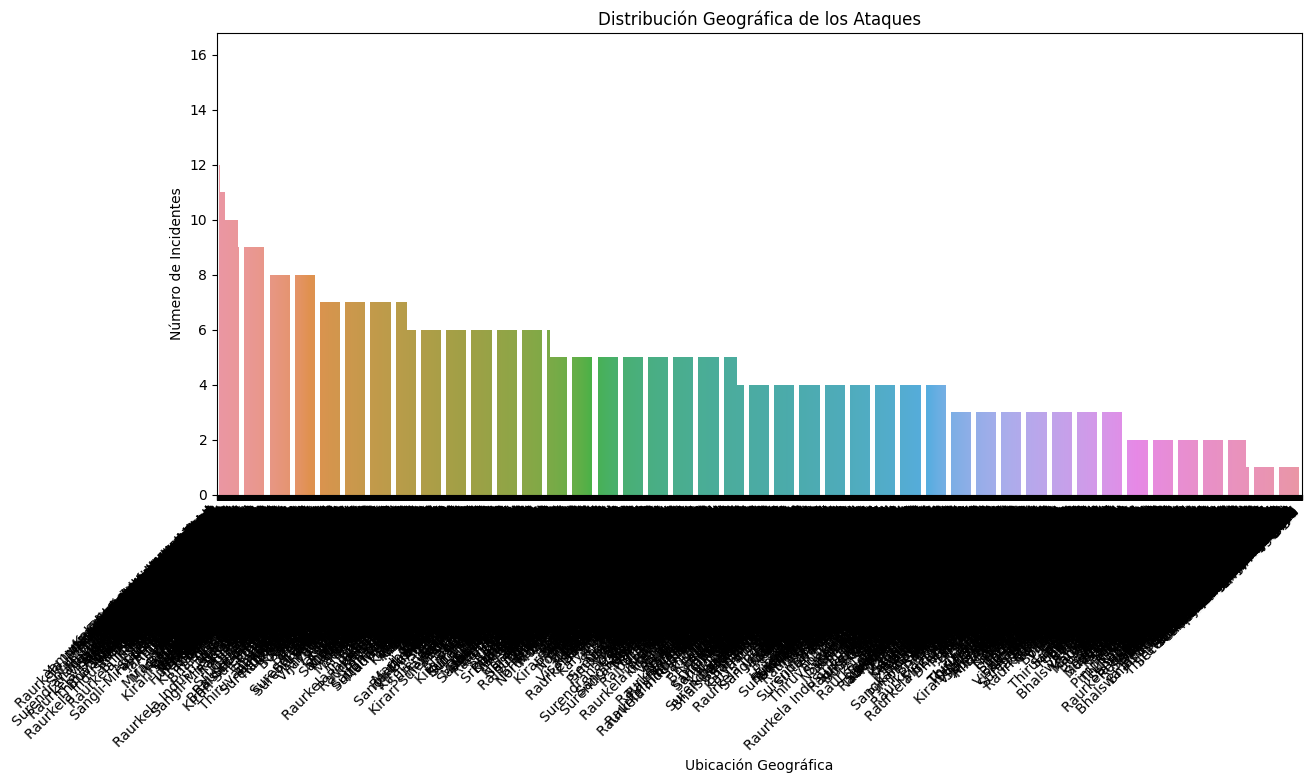

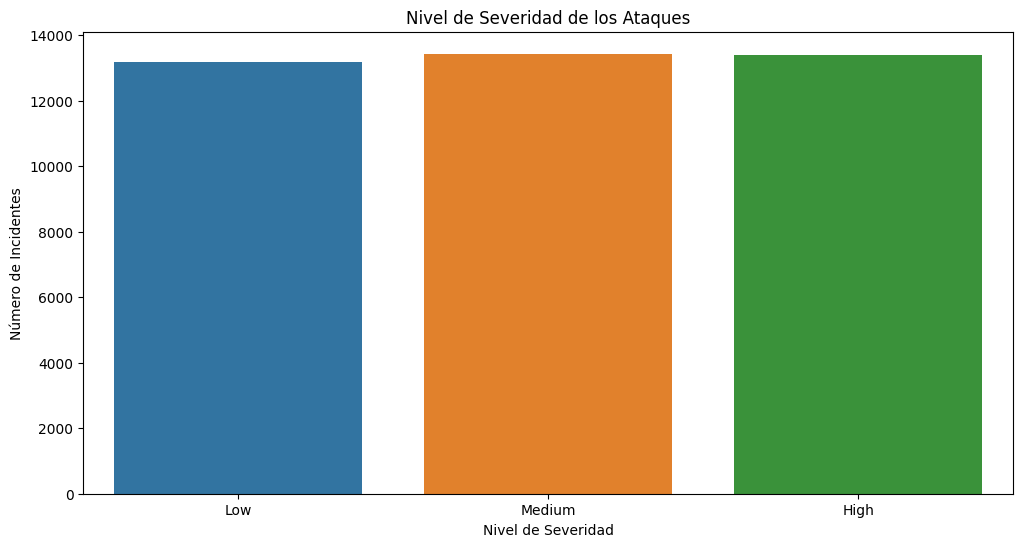

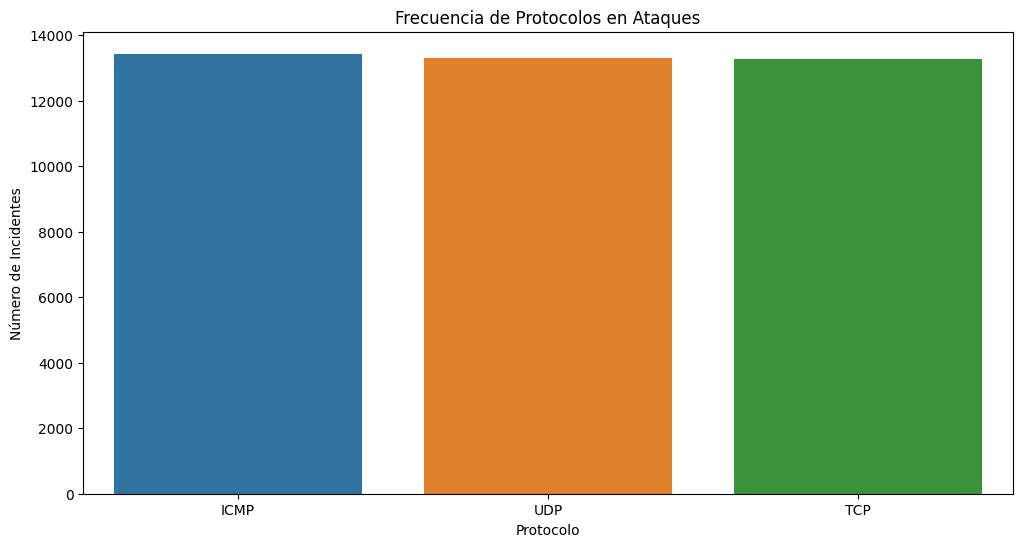

ValueError: could not convert string to float: '103.216.15.12'

<Figure size 1200x800 with 0 Axes>

In [9]:

# Convertir la columna 'Fecha_hora' a formato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])


# Distribución de Ataques
plt.figure(figsize=(12, 6))
sns.countplot(x='Tipo_ataque', data=data)
plt.title('Distribución de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.show()

# Análisis Temporal
data['Año'] = data['Fecha_hora'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Año', data=data)
plt.title('Número de Ataques a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.show()

# Origen de los Ataques
plt.figure(figsize=(14, 6))
sns.countplot(x='Datos_geolocalización', data=data, order=data['Datos_geolocalización'].value_counts().index)
plt.title('Distribución Geográfica de los Ataques')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Consecuencias y Respuestas
plt.figure(figsize=(12, 6))
sns.countplot(x='Nivel_severidad', data=data)
plt.title('Nivel de Severidad de los Ataques')
plt.xlabel('Nivel de Severidad')
plt.ylabel('Número de Incidentes')
plt.show()

# Frecuencia de Protocolos
plt.figure(figsize=(12, 6))
sns.countplot(x='Protocolo', data=data)
plt.title('Frecuencia de Protocolos en Ataques')
plt.xlabel('Protocolo')
plt.ylabel('Número de Incidentes')
plt.show()

# Exploración de Características
# (Puedes agregar gráficos e histogramas para las características específicas)

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables')
plt.show()

# Identificar columnas no numéricas
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns)


# Seleccionar solo las columnas numéricas excluyendo 'Datos_geolocalización'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Datos_geolocalización'], errors='ignore')

# Codificar columnas categóricas
data_encoded = pd.get_dummies(data)

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables')
plt.show()



# Crear un histograma de la distribución de tipos de ataques
plt.figure(figsize=(10, 6))
df['Tipo_ataque'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()




